# Course Project: Analyzing Gun Violence incidents

### CS 6316 Machine Learning - Department of Computer Science - University of Virginia

---
## DATA OVERVIEW

In [1]:
# Import some common packages
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

# to make this notebook's output stable across runs
np.random.seed(42)

DATA_PATH = '.'

def load_data(data_path=DATA_PATH, filename="gun-violence-data_01-2013_03-2018.csv"):
    csv_path = os.path.join(data_path, filename)
    return pd.read_csv(csv_path)

all_data = load_data()

In [2]:
# Start with a subset that only contains Virginia events
VA_data = all_data.loc[all_data['state']=='Virginia']
VA_data = VA_data.reset_index()
VA_data.head()

,index,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,...,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district
0,79,486611,2013-05-18,Virginia,Victoria,2073 Pleasant Oak Rd,0,4,http://www.gunviolencearchive.org/incident/486611,http://southsidemessenger.com/shooter-accepts-...,...,4::22,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male||5...,0::Stan Woods||1::Dequan Jones||2::Treyvious G...,NaN,0::Injured||1::Injured||2::Injured||3::Injured...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://www.nbc12.com/story/22291717/man-wanted...,75.0,15.0
1,86,486998,2013-05-25,Virginia,Hampton,1900 block of Coliseum Drive,1,4,http://www.gunviolencearchive.org/incident/486998,http://wavy.com/2014/04/15/charges-could-be-dr...,...,0::16||1::14||2::16||3::17||4::18||5::15||6::17,0::Teen 12-17||1::Teen 12-17||2::Teen 12-17||3...,0::Male||5::Male||6::Male,0::Ralphael Davis Jr||5::Ryan Taybron||6::Eric...,NaN,0::Killed||1::Injured||2::Injured||3::Injured|...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://articles.dailypress.com/2013-05-28/news...,92.0,2.0
2,93,487271,2013-06-02,Virginia,Virginia Beach,4000 block of Roebling Lane,0,7,http://www.gunviolencearchive.org/incident/487271,http://articles.dailypress.com/2013-06-02/news...,...,NaN,3::Adult 18+||4::Adult 18+||5::Adult 18+||6::A...,3::Male||4::Male||5::Male||6::Male||8::Male||9...,NaN,NaN,0::Injured||1::Injured||2::Injured||3::Injured...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://articles.dailypress.com/2013-06-02/news...,82.0,7.0
3,105,488505,2013-06-21,Virginia,Norfolk,1225 Tidewater Drive,0,6,http://www.gunviolencearchive.org/incident/488505,http://www.13newsnow.com/story/news/2014/09/09...,...,0::16||1::17||6::25||7::20||8::20||9::24,0::Teen 12-17||1::Teen 12-17||6::Adult 18+||7:...,6::Male||7::Male||8::Male||9::Male,6::Kyle Edward Thornton||7::Darren Lamont Robe...,NaN,0::Injured||1::Injured||2::Injured||3::Injured...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://pilotonline.com/news/local/crime/police...,89.0,5.0
4,113,489129,2013-06-23,Virginia,Virginia Beach,4600 block of Columbus Street,1,4,http://www.gunviolencearchive.org/incident/489129,http://www.13newsnow.com/story/news/2014/09/09...,...,0::25,0::Adult 18+,0::Male,0::Rashawn R. Dukes,NaN,0::Killed||1::Injured||2::Injured||3::Injured|...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://www.13newsnow.com/story/news/2014/09/09...,85.0,7.0


In [3]:
VA_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5949 entries, 0 to 5948
Data columns (total 30 columns):
index                          5949 non-null int64
incident_id                    5949 non-null int64
date                           5949 non-null object
state                          5949 non-null object
city_or_county                 5949 non-null object
address                        5706 non-null object
n_killed                       5949 non-null int64
n_injured                      5949 non-null int64
incident_url                   5949 non-null object
source_url                     5941 non-null object
incident_url_fields_missing    5949 non-null bool
congressional_district         5656 non-null float64
gun_stolen                     3000 non-null object
gun_type                       3002 non-null object
incident_characteristics       5932 non-null object
latitude                       5678 non-null float64
location_description           1076 non-null object
longitude    

In [4]:
VA_data.describe()

,index,incident_id,n_killed,n_injured,congressional_district,latitude,longitude,n_guns_involved,state_house_district,state_senate_district
count,5949.000000,5.949000e+03,5949.000000,5949.000000,5656.000000,5678.000000,5678.000000,3002.000000,5654.000000,5654.000000
mean,118988.595898,5.535545e+05,0.245251,0.599428,4.337341,37.361878,-77.431925,1.199867,64.054298,13.880615
std,67693.146593,2.864360e+05,0.502043,0.725002,2.420746,0.608199,1.336288,1.732347,28.399610,10.054745
min,79.000000,9.212200e+04,0.000000,0.000000,1.000000,36.090000,-88.463100,1.000000,1.000000,1.000000
25%,61225.000000,3.129690e+05,0.000000,0.000000,3.000000,36.875525,-77.521350,1.000000,49.000000,5.000000
50%,121107.000000,5.459920e+05,0.000000,1.000000,3.000000,37.232900,-77.361950,1.000000,71.000000,11.000000
75%,174258.000000,7.932450e+05,0.000000,1.000000,6.000000,37.549100,-76.378250,1.000000,89.000000,20.000000
max,239591.000000,1.083347e+06,6.000000,10.000000,11.000000,39.341300,-75.379500,50.000000,100.000000,40.000000


We can see there are some missing values. And some columns may need to be preprocessed before we actually use it, such as "participant_status", whose value is like "0::Injured, Unharmed, Arrested||1::Unharmed, Arrested||2::Killed".

---
## DATA PREPROCESSING


In [5]:
# You might want to use the following package
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix # optional
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from copy import deepcopy

# Drop
processed_data = deepcopy(VA_data)
dropped_columns = ['incident_id', 'address', 'incident_url', 'source_url', 'incident_url_fields_missing', 'gun_stolen', 'gun_type', 'location_description', 'n_guns_involved', 'notes', 'participant_age', 'participant_name', 'participant_relationship', 'sources']

processed_data = processed_data.drop(dropped_columns, axis=1)

The following codes tries to get some insight about the columns.

In [6]:
#extract month and year from date
processed_data['month'] = pd.DatetimeIndex(processed_data['date']).month
processed_data['year'] = pd.DatetimeIndex(processed_data['date']).year

In [7]:
def getColumnDict(column_name):
    column = processed_data[column_name]
    temp_dict = {}
    for line in column:
        s = str(line).replace('||', '|')
        arr = s.split('|')
        for e in arr:
            e = e.replace('::', ':')
            if e.find(':') != -1:
                e = e[e.find(':')+1:]
            if e not in temp_dict:
                #print(e)
                temp_dict[e] = 1
            else:
                temp_dict[e] += 1
    temp_dict = sorted(temp_dict.items(), key=lambda d: d[1], reverse=True)
    return temp_dict

In [8]:
chara_dict = getColumnDict('incident_characteristics')
print(chara_dict)

[('Shot - Wounded/Injured', 2908), ('Shot - Dead (murder, accidental, suicide)', 1294), ('Shots Fired - No Injuries', 791), ('Non-Shooting Incident', 665), ('Armed robbery with injury/death and/or evidence of DGU found', 546), ('Officer Involved Incident', 353), ('Possession of gun by felon or prohibited person', 309), ('Institution/Group/Business', 297), ('Brandishing/flourishing/open carry/lost/found', 290), ('Home Invasion', 283), ('Domestic Violence', 274), ('Drive-by (car to street, car to car)', 235), ('Drug involvement', 207), ('Accidental Shooting', 206), ('Possession (gun(s) found during commission of other crimes)', 191), ('ATF/LE Confiscation/Raid/Arrest', 161), ('Home Invasion - No death or injury', 154), ('Accidental/Negligent Discharge', 141), ('Accidental Shooting - Injury', 137), ('Suicide^', 136), ('Car-jacking', 108), ('TSA Action', 106), ('Defensive Use', 104), ('School Incident', 104), ('Gun at school, no death/injury - elementary/secondary school', 85), ('Officer I

In [9]:
age_group_dict = getColumnDict('participant_age_group')
print(age_group_dict)

[('Adult 18+', 7598), ('nan', 945), ('Teen 12-17', 712), ('Child 0-11', 125)]


In [10]:
gender_dict = getColumnDict('participant_gender')
print(gender_dict)

[('Male', 7735), ('Female', 1016), ('nan', 840)]


In [11]:
status_dict = getColumnDict('participant_status')
print(status_dict)

[('Injured', 3474), ('Unharmed', 2364), ('Unharmed, Arrested', 1977), ('Killed', 1456), ('nan', 542), ('Injured, Arrested', 87), ('Arrested', 85), ('Injured, Unharmed', 3), ('Killed, Arrested', 2), ('Killed, Unharmed', 1), ('Injured, Unharmed, Arrested', 1), ('Killed, Unharmed, Arrested', 1)]


In [12]:
type_dict = getColumnDict('participant_type')
print(type_dict)

[('Victim', 5178), ('Subject-Suspect', 4528), ('nan', 518)]


We can see there is a small portion of bad data.

we cannot skip these features as these contain a lot of vital information. So we have decided to extract useful information and add below columns in our dataframe:

1. participant_age_group - There are only 3 categories of participants so we will count the number of participants belonging to these groups:
    a. child_participants - '0-11' years old
    b. teen_participants - '12-17' years old
    c. adult_participants - '18+' years old

2. participant_gender - We can count the number of males and females involved in an incident to get the gender ratio.
- no of male
-  no of females

3. participant_status -> We can count the number of participants in each category. we already have n_killed and n_injured columns.
- n_unharmed, 
- n_arrested, 
- If someone is arrested: For our problem of predicting gun-violence, we ignore if suspect was arrested unharmed or injured.

4. participant_type - We can get an idea of number of victims involved and number of suspects identified.
- victims involved
- suspects identified  

5. incident_characteristics
Shot
non-shooting
home invasion
domestic violence


In [13]:
processed_data.head()

,index,date,state,city_or_county,n_killed,n_injured,congressional_district,incident_characteristics,latitude,longitude,participant_age_group,participant_gender,participant_status,participant_type,state_house_district,state_senate_district,month,year
0,79,2013-05-18,Virginia,Victoria,0,4,5.0,Shot - Wounded/Injured||Drive-by (car to stree...,37.0177,-78.1562,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male||5...,0::Injured||1::Injured||2::Injured||3::Injured...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,75.0,15.0,5,2013
1,86,2013-05-25,Virginia,Hampton,1,4,3.0,"Shot - Wounded/Injured||Shot - Dead (murder, a...",37.0377,-76.3859,0::Teen 12-17||1::Teen 12-17||2::Teen 12-17||3...,0::Male||5::Male||6::Male,0::Killed||1::Injured||2::Injured||3::Injured|...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,92.0,2.0,5,2013
2,93,2013-06-02,Virginia,Virginia Beach,0,7,2.0,Shot - Wounded/Injured||Mass Shooting (4+ vict...,36.8459,-76.1171,3::Adult 18+||4::Adult 18+||5::Adult 18+||6::A...,3::Male||4::Male||5::Male||6::Male||8::Male||9...,0::Injured||1::Injured||2::Injured||3::Injured...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,82.0,7.0,6,2013
3,105,2013-06-21,Virginia,Norfolk,0,6,3.0,Shot - Wounded/Injured||Mass Shooting (4+ vict...,36.8571,-76.2735,0::Teen 12-17||1::Teen 12-17||6::Adult 18+||7:...,6::Male||7::Male||8::Male||9::Male,0::Injured||1::Injured||2::Injured||3::Injured...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,89.0,5.0,6,2013
4,113,2013-06-23,Virginia,Virginia Beach,1,4,2.0,"Shot - Wounded/Injured||Shot - Dead (murder, a...",36.8410,-76.1371,0::Adult 18+,0::Male,0::Killed||1::Injured||2::Injured||3::Injured|...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,85.0,7.0,6,2013


In [14]:
# add new columns to our dataframe
new_columns = [['child_participants', 'teen_participants', 'adult_participants'],
              ['male_participants', 'female_participants'],
              ['arrested_participants', 'injured_participants', 'killed_participants', 'unharmed_participants'],
              ['victims_involved', 'suspects_identified']];

for item in new_columns:
    for col in item:
        processed_data[col] = 0;

processed_data.head()

,index,date,state,city_or_county,n_killed,n_injured,congressional_district,incident_characteristics,latitude,longitude,...,teen_participants,adult_participants,male_participants,female_participants,arrested_participants,injured_participants,killed_participants,unharmed_participants,victims_involved,suspects_identified
0,79,2013-05-18,Virginia,Victoria,0,4,5.0,Shot - Wounded/Injured||Drive-by (car to stree...,37.0177,-78.1562,...,0,0,0,0,0,0,0,0,0,0
1,86,2013-05-25,Virginia,Hampton,1,4,3.0,"Shot - Wounded/Injured||Shot - Dead (murder, a...",37.0377,-76.3859,...,0,0,0,0,0,0,0,0,0,0
2,93,2013-06-02,Virginia,Virginia Beach,0,7,2.0,Shot - Wounded/Injured||Mass Shooting (4+ vict...,36.8459,-76.1171,...,0,0,0,0,0,0,0,0,0,0
3,105,2013-06-21,Virginia,Norfolk,0,6,3.0,Shot - Wounded/Injured||Mass Shooting (4+ vict...,36.8571,-76.2735,...,0,0,0,0,0,0,0,0,0,0
4,113,2013-06-23,Virginia,Virginia Beach,1,4,2.0,"Shot - Wounded/Injured||Shot - Dead (murder, a...",36.8410,-76.1371,...,0,0,0,0,0,0,0,0,0,0


In [15]:
# Extract for each row: from column_name_list[i] extract info_list[i] values.
# Return list of dictionaries where dictionary at list[i] corresponds to column_name_list[i].
# 5::Injured||6::Unharmed||7::Unharmed, Arrested||8::Unharmed, Arrested||9::Unharmed, Arrested
processed_data_new = processed_data.copy()

new_columns = [['child_participants', 'teen_participants', 'adult_participants'],
              ['male_participants', 'female_participants'],
              ['arrested_participants', 'injured_participants', 'killed_participants', 'unharmed_participants'],
              ['victims_involved', 'suspects_identified']];

info_list = [
               ['Child', 'Teen','Adult'],
               ['Male', 'Female'],
               ['Arrested', 'Injured', 'Killed', 'Unharmed'],
               ['Victim', 'Suspect']
            ];

def extractInfoFromColumns(row_index, column_name_list, info_list, new_columns):
    
    temp_dict = {}
    for i in range(len(column_name_list)):
        column_name = column_name_list[i]
        line = processed_data.at[row_index,column_name]        
        #print(line)
        #break
        s = str(line).replace('||', '|')
        arr = s.split('|')
        for e in arr:
            e = e.replace('::', ':')
            if e.find(':') != -1:
                e = e[e.find(':')+1:]
            
            if ", Arrested" in e:
                e= 'Arrested'
            
            #print(e)
            item = info_list[i]                
            for j in range(len(item)):
                #print(item[j])
                if item[j] in e:
                    new_col = new_columns[i][j]
                    if new_col not in temp_dict:
                        #print(e)
                        temp_dict[new_col] = 1
                    else:
                        temp_dict[new_col] += 1
                #else:
                    #print('not found '+item[j])
    #print(temp_dict)
    for key, value in temp_dict.items():
        processed_data_new.at[row_index,key] = value
        
cols = ['participant_age_group', 'participant_gender', 'participant_status', 'participant_type']
for i in range(len(processed_data)):
    extractInfoFromColumns(i, cols, info_list, new_columns)

    
processed_data_new.head()

,index,date,state,city_or_county,n_killed,n_injured,congressional_district,incident_characteristics,latitude,longitude,...,teen_participants,adult_participants,male_participants,female_participants,arrested_participants,injured_participants,killed_participants,unharmed_participants,victims_involved,suspects_identified
0,79,2013-05-18,Virginia,Victoria,0,4,5.0,Shot - Wounded/Injured||Drive-by (car to stree...,37.0177,-78.1562,...,0,6,6,0,2,4,0,0,4,2
1,86,2013-05-25,Virginia,Hampton,1,4,3.0,"Shot - Wounded/Injured||Shot - Dead (murder, a...",37.0377,-76.3859,...,6,1,3,0,0,4,1,0,5,2
2,93,2013-06-02,Virginia,Virginia Beach,0,7,2.0,Shot - Wounded/Injured||Mass Shooting (4+ vict...,36.8459,-76.1171,...,0,7,6,0,0,7,0,6,4,6
3,105,2013-06-21,Virginia,Norfolk,0,6,3.0,Shot - Wounded/Injured||Mass Shooting (4+ vict...,36.8571,-76.2735,...,2,4,4,0,3,6,0,1,6,4
4,113,2013-06-23,Virginia,Virginia Beach,1,4,2.0,"Shot - Wounded/Injured||Shot - Dead (murder, a...",36.8410,-76.1371,...,0,1,1,0,0,4,1,0,5,0


In [16]:
#dropping the original columns after parsing
processed_data_new = processed_data_new.drop('incident_characteristics', axis=1)
processed_data_new = processed_data_new.drop('participant_age_group', axis=1)
processed_data_new = processed_data_new.drop('participant_gender', axis=1)
processed_data_new = processed_data_new.drop('participant_status', axis=1)
processed_data_new = processed_data_new.drop('participant_type', axis=1)
processed_data_new = processed_data_new.drop('killed_participants', axis=1) #same as n_killed
processed_data_new = processed_data_new.drop('injured_participants', axis=1) #same as n_injured
processed_data_new = processed_data_new.drop('date', axis=1)
processed_data_new = processed_data_new.drop('state', axis=1) #since state is virginia

In [17]:
processed_data_new.head()

,index,city_or_county,n_killed,n_injured,congressional_district,latitude,longitude,state_house_district,state_senate_district,month,year,child_participants,teen_participants,adult_participants,male_participants,female_participants,arrested_participants,unharmed_participants,victims_involved,suspects_identified
0,79,Victoria,0,4,5.0,37.0177,-78.1562,75.0,15.0,5,2013,0,0,6,6,0,2,0,4,2
1,86,Hampton,1,4,3.0,37.0377,-76.3859,92.0,2.0,5,2013,0,6,1,3,0,0,0,5,2
2,93,Virginia Beach,0,7,2.0,36.8459,-76.1171,82.0,7.0,6,2013,0,0,7,6,0,0,6,4,6
3,105,Norfolk,0,6,3.0,36.8571,-76.2735,89.0,5.0,6,2013,0,2,4,4,0,3,1,6,4
4,113,Virginia Beach,1,4,2.0,36.8410,-76.1371,85.0,7.0,6,2013,0,0,1,1,0,0,0,5,0


In [18]:
processed_data_new["city_or_county"].value_counts()

#maximum incidents have occured in Richmond and Norfolk cities while no of incidents in Charlottesville are 76.

Richmond                     994
Norfolk                      622
Newport News                 536
Hampton                      360
Virginia Beach               289
Portsmouth                   271
Roanoke                      227
Danville                     151
Chesapeake                   137
Petersburg                   129
Chesterfield                 102
Lynchburg                    100
Henrico                       89
Henrico (county)              85
Alexandria                    84
Woodbridge                    78
Suffolk                       78
Charlottesville               76
Arlington                     63
Hopewell                      54
Fredericksburg                45
Manassas                      43
Stafford                      39
Chesterfield (county)         32
Williamsburg                  30
Martinsville                  29
Waynesboro                    27
Dulles                        23
Falls Church                  22
Sterling                      19
          

In [19]:
processed_data_new["year"].value_counts()

#most of our data is recent and we have a good amount of data for each year.

2016    1578
2017    1473
2015    1326
2014    1273
2018     293
2013       6
Name: year, dtype: int64

In [20]:
#checking for null values
print(processed_data_new.isnull().sum())

index                       0
city_or_county              0
n_killed                    0
n_injured                   0
congressional_district    293
latitude                  271
longitude                 271
state_house_district      295
state_senate_district     295
month                       0
year                        0
child_participants          0
teen_participants           0
adult_participants          0
male_participants           0
female_participants         0
arrested_participants       0
unharmed_participants       0
victims_involved            0
suspects_identified         0
dtype: int64


In [21]:
processed_data_new[processed_data_new.isnull().any(axis=1)].head()

,index,city_or_county,n_killed,n_injured,congressional_district,latitude,longitude,state_house_district,state_senate_district,month,year,child_participants,teen_participants,adult_participants,male_participants,female_participants,arrested_participants,unharmed_participants,victims_involved,suspects_identified
58,1933,Henrico County,1,0,NaN,NaN,NaN,NaN,NaN,1,2014,0,0,2,2,0,1,0,1,1
529,20588,Norfolk,1,0,NaN,NaN,NaN,NaN,NaN,6,2014,0,0,2,2,0,1,0,0,2
611,23491,Axton,1,0,5.0,36.6625,-79.7336,NaN,20.0,6,2014,0,0,1,1,0,0,0,1,0
1189,48193,Roanoke,0,0,NaN,NaN,NaN,NaN,NaN,11,2014,0,0,2,2,0,2,0,0,2
1314,53727,Chesapeake,1,0,NaN,NaN,NaN,NaN,NaN,1,2015,0,0,1,1,0,0,0,1,0


In [22]:
# it does not make sense to put median values in latitude and longitude /location specific fields 
# and since the rows are quite few as compared to our datasize, we can drop these rows with null values.

processed_data_new = processed_data_new.dropna(subset=["congressional_district", 
                                                       "state_senate_district",
                                                       "state_house_district"])
processed_data_new.shape

(5653, 20)

In [23]:
#checking for null values after dropping
print(processed_data_new.isnull().sum())

index                     0
city_or_county            0
n_killed                  0
n_injured                 0
congressional_district    0
latitude                  0
longitude                 0
state_house_district      0
state_senate_district     0
month                     0
year                      0
child_participants        0
teen_participants         0
adult_participants        0
male_participants         0
female_participants       0
arrested_participants     0
unharmed_participants     0
victims_involved          0
suspects_identified       0
dtype: int64


In [24]:
#splitting data into train and test for analysis
train_set, test_set = train_test_split(processed_data_new, test_size=0.2, random_state=42)

print("train: ",train_set.shape)
print("test: ",test_set.shape)

train:  (4522, 20)
test:  (1131, 20)


In [25]:
from future_encoders import ColumnTransformer
from future_encoders import OneHotEncoder

train_set_num = train_set.drop('city_or_county', axis=1)
train_set_cat = train_set[['city_or_county']]

num_pipeline = Pipeline([
        ('imputer', Imputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

num_attribs = list(train_set_num)
cat_attribs = ["city_or_county"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        #("cat", OneHotEncoder(), cat_attribs),
    ])

X_train = full_pipeline.fit_transform(train_set)
X_train

c:\python37\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
c:\python37\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


array([[ 0.34962696, -0.47515657, -0.82223768, ...,  0.69130362,
        -1.14082759,  0.26465573],
       [ 1.2384174 , -0.47515657,  0.54222426, ..., -0.46010521,
         0.18160829, -0.81449053],
       [-0.74464653, -0.47515657, -0.82223768, ..., -0.46010521,
        -1.14082759,  0.26465573],
       ...,
       [ 1.48490567, -0.47515657,  0.54222426, ..., -0.46010521,
         0.18160829, -0.81449053],
       [ 1.60007994,  1.51250117, -0.82223768, ..., -0.46010521,
         0.18160829,  0.26465573],
       [-1.22734965, -0.47515657, -0.82223768, ...,  0.69130362,
         0.18160829,  0.26465573]])

In [26]:
test_set_num = test_set.drop('city_or_county', axis=1)
test_set_cat = test_set[['city_or_county']]

X_test = full_pipeline.transform(test_set_num)
X_test

array([[ 0.48814856,  1.51250117, -0.82223768, ..., -0.46010521,
         0.18160829, -0.81449053],
       [-1.17571726, -0.47515657,  0.54222426, ..., -0.46010521,
         0.18160829, -0.81449053],
       [ 0.49739021, -0.47515657, -0.82223768, ..., -0.46010521,
        -1.14082759, -0.81449053],
       ...,
       [-1.31886706, -0.47515657, -0.82223768, ...,  0.69130362,
         0.18160829,  0.26465573],
       [ 0.75709979,  1.51250117, -0.82223768, ..., -0.46010521,
         0.18160829,  0.26465573],
       [-1.35602528,  1.51250117, -0.82223768, ...,  0.69130362,
         0.18160829,  0.26465573]])

# Starting from here is what I added

## Now I try to do classification about whether there are people arrested

In [27]:
# find index of 'arrested_participants'
i = 0
for column in processed_data_new:
    if column == 'arrested_participants':
        break
    i += 1
print(i)

16


In [28]:
cy_train = X_train[:, i]
cy_test = X_test[:, i]
cX_train = np.delete(X_train, [i], axis=1)
cX_test = np.delete(X_test, [i], axis=1)

print(len(cy_test), len(cy_train), len(cX_test), len(cX_train))

1131 4522 1131 4522


In [29]:
# whether there are people arrested is the label
MIN = 999
for i in range(len(cy_train)):
    if MIN > cy_train[i]:
        MIN = cy_train[i]

# if there are people arrested, then the label is 1. Otherwise 0.
for i in range(len(cy_train)):
    if MIN == cy_train[i]:
        cy_train[i] = 0
    else:
        cy_train[i] = 1
for i in range(len(cy_test)):
    if MIN == cy_test[i]:
        cy_test[i] = 0
    else:
        cy_test[i] = 1

Accuracy: 0.9885057471264368
Precision: 0.9586206896551724
Recall: 0.996415770609319


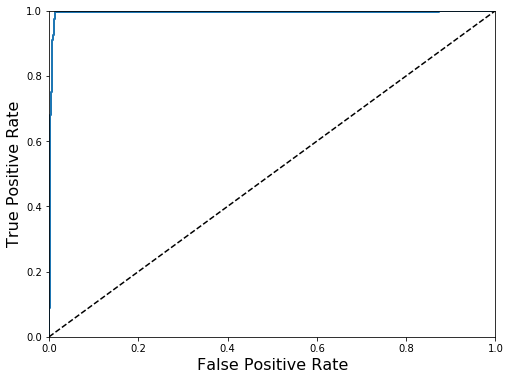

Area under curve: 0.9938033217224493


In [30]:
from sklearn.svm import LinearSVC
from sklearn.metrics import roc_auc_score

# Using SVC
svm_clf = LinearSVC(C=1, loss="hinge")

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import roc_curve

svm_clf.fit(cX_train, cy_train)
cy_pred = svm_clf.predict(cX_test)
print("Accuracy:", accuracy_score(cy_test, cy_pred))
print("Precision:", precision_score(cy_test, cy_pred))
print("Recall:", recall_score(cy_test, cy_pred))

cy_scores = svm_clf.decision_function(cX_test)
fpr, tpr, thresholds = roc_curve(cy_test, cy_scores)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.show()

print("Area under curve:", roc_auc_score(cy_test, cy_scores))

## Now I try to do classification about whether there are non-adults involved

In [31]:
# find index of 'child_participants" "teen_participants'
i = 0
for column in processed_data_new:
    if column == 'child_participants':
        break
    i += 1
j = 0
for column in processed_data_new:
    if column == 'teen_participants':
        break
    j += 1
print(i, j)

11 12


In [32]:
cy_train2 = X_train[:, i:i+2]  # notice i and j are consecutive
cy_test2 = X_test[:, i:i+2]
cX_train = np.delete(X_train, [i, j], axis=1)
cX_test = np.delete(X_test, [i, j], axis=1)

print(len(cy_test2), len(cy_train2), len(cX_test), len(cX_train))
print(cy_train2)

1131 4522 1131 4522
[[-0.28283663 -1.17881773]
 [-0.28283663 -0.24493305]
 [-0.28283663 -0.24493305]
 ...
 [-0.28283663 -0.24493305]
 [-0.28283663  0.68895163]
 [-0.28283663 -0.24493305]]


In [33]:
# whether there are non-adult involved is the label
MIN = [999, 999]
for i in range(len(cy_train2)):
    for j in range(2):
        if MIN[j] > cy_train2[i][j]:
            MIN[j] = cy_train2[i][j]

cy_train = [[0] for zzz in range(len(cy_train))]
cy_test = [[0] for zzz in range(len(cy_test))]

for i in range(len(cy_train2)):
    flag = False
    for j in range(2):
        if MIN[j] != cy_train2[i][j]:
            flag = True
    if flag:
        cy_train[i] = 1
    else:
        cy_train[i] = 0

for i in range(len(cy_test2)):
    flag = False
    for j in range(2):
        if MIN[j] != cy_test2[i][j]:
            flag = True
    if flag:
        cy_test[i] = 1
    else:
        cy_test[i] = 0

Accuracy: 0.946949602122016
Precision: 0.9623430962343096
Recall: 0.9745762711864406


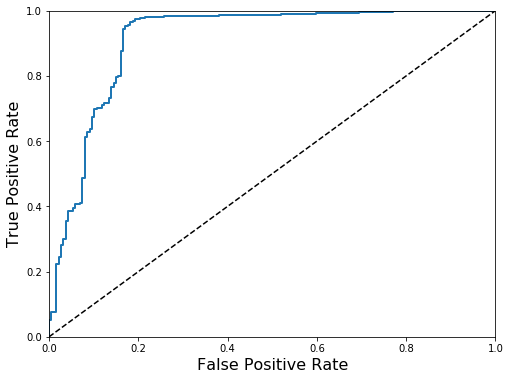

Area under curve: 0.9116287501132966


In [34]:
from sklearn.svm import LinearSVC
from sklearn.metrics import roc_auc_score

# Using SVC
svm_clf = LinearSVC(C=1, loss="hinge")

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import roc_curve

svm_clf.fit(cX_train, cy_train)
cy_pred = svm_clf.predict(cX_test)
print("Accuracy:", accuracy_score(cy_test, cy_pred))
print("Precision:", precision_score(cy_test, cy_pred))
print("Recall:", recall_score(cy_test, cy_pred))

cy_scores = svm_clf.decision_function(cX_test)
fpr, tpr, thresholds = roc_curve(cy_test, cy_scores)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.show()

print("Area under curve:", roc_auc_score(cy_test, cy_scores))

## Obviously this is a much worse prediction, indicating the label I defined here cannot be well predicted by other features.

## What about whether there are female participated?

In [35]:
# find index of 'female_participants'
i = 0
for column in processed_data_new:
    if column == 'female_participants':
        break
    i += 1
print(i)

15


In [36]:
cy_train = X_train[:, i]
cy_test = X_test[:, i]
cX_train = np.delete(X_train, [i], axis=1)
cX_test = np.delete(X_test, [i], axis=1)

print(len(cy_test), len(cy_train), len(cX_test), len(cX_train))

1131 4522 1131 4522


In [37]:
# whether there are female participated is the label
MIN = 999
for i in range(len(cy_train)):
    if MIN > cy_train[i]:
        MIN = cy_train[i]

# if there are female participated, then the label is 1. Otherwise 0.
for i in range(len(cy_train)):
    if MIN == cy_train[i]:
        cy_train[i] = 0
    else:
        cy_train[i] = 1
for i in range(len(cy_test)):
    if MIN == cy_test[i]:
        cy_test[i] = 0
    else:
        cy_test[i] = 1

Accuracy: 0.946949602122016
Precision: 0.8637873754152824
Recall: 0.931899641577061


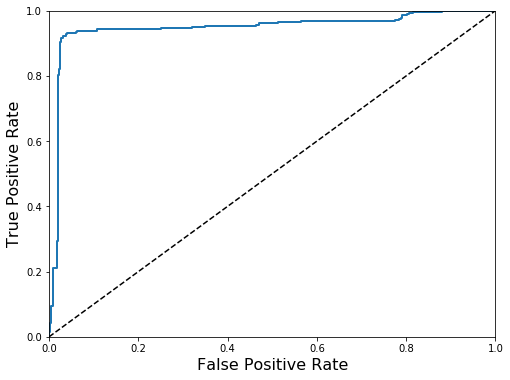

Area under curve: 0.9464174533461222


In [38]:
from sklearn.svm import LinearSVC
from sklearn.metrics import roc_auc_score

# Using SVC
svm_clf = LinearSVC(C=1, loss="hinge")

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import roc_curve

svm_clf.fit(cX_train, cy_train)
cy_pred = svm_clf.predict(cX_test)
print("Accuracy:", accuracy_score(cy_test, cy_pred))
print("Precision:", precision_score(cy_test, cy_pred))
print("Recall:", recall_score(cy_test, cy_pred))

cy_scores = svm_clf.decision_function(cX_test)
fpr, tpr, thresholds = roc_curve(cy_test, cy_scores)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.show()

print("Area under curve:", roc_auc_score(cy_test, cy_scores))

## This is also worse than the first one (whether there are people arrested), but better than the second one (whether there are non-adults involved).

# Clustering using KMeans in sklearn, where Euclidean distance is computed
And we can see from the plot that the data is mainly from east Virginia

c:\python37\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\python37\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


2 clusters:
Sum of squared distances of samples to their closest cluster center is: 86663.30060855458
Cluster centers (inversed): [[ 2.32961907e-01  6.74527080e-01  3.11272350e+00  3.71641643e+01
  -7.67852213e+01  8.00093288e+01  8.58434828e+00  6.32469552e+00
   2.01565846e+03  2.35812387e-02  1.23607152e-01  1.24306815e+00
   1.29100803e+00  1.61181653e-01  2.60171029e-01  4.41306038e-01
   9.52837523e-01  6.80228038e-01]
 [ 2.48606466e-01  4.18617614e-01  6.97157191e+00  3.77874428e+01
  -7.88231185e+01  2.97619844e+01  2.52697882e+01  6.29375697e+00
   2.01567224e+03  1.50501672e-02  1.10925307e-01  1.31493868e+00
   1.27982163e+00  1.83946488e-01  5.39018952e-01  3.45596433e-01
   6.65551839e-01  9.25863991e-01]]
3 clusters:
Sum of squared distances of samples to their closest cluster center is: 77261.51525330047
Cluster centers (inversed): [[ 2.36890808e-01  3.88648982e-01  7.06847625e+00  3.77907207e+01
  -7.88574568e+01  2.95934608e+01  2.55058606e+01  6.26896977e+00
   2.0157

Sum of squared distances of samples to their closest cluster center is: 58070.787088519224
Cluster centers (inversed): [[ 7.77310924e-02  4.51680672e-01  3.81932773e+00  3.72807380e+01
  -7.70934410e+01  7.14600840e+01  1.10924370e+01  6.35714286e+00
   2.01467017e+03  4.20168067e-03  1.23949580e-01  2.62184874e+00
   2.76680672e+00  2.73109244e-01  4.41176471e-02  2.70168067e+00
   1.09243697e+00  2.28151261e+00]
 [ 6.81044268e-03  1.18955732e+00  3.12599319e+00  3.71426438e+01
  -7.67588331e+01  8.02639047e+01  8.74971623e+00  6.31725312e+00
   2.01585528e+03  3.46944695e-16  1.14074915e-01  1.06299659e+00
   1.05675369e+00  1.59477866e-01  9.70488082e-02  1.00454030e-01
   1.18671964e+00  2.08286039e-01]
 [ 2.21343874e-01  4.88801054e-01  6.68511199e+00  3.70749580e+01
  -8.01136630e+01  1.32727273e+01  2.42187088e+01  6.36363636e+00
   2.01567457e+03 -4.85722573e-17  1.02766798e-01  1.15019763e+00
   1.10540184e+00  1.56785244e-01  3.95256917e-01  2.27931489e-01
   6.75889328e-01  

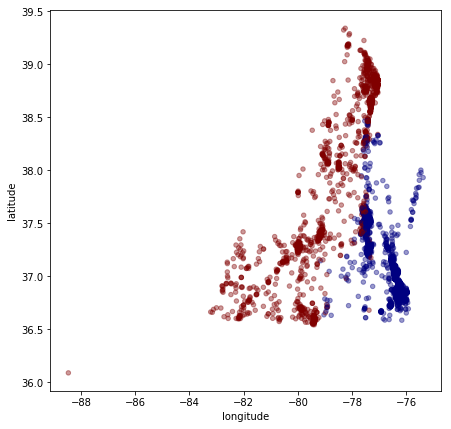

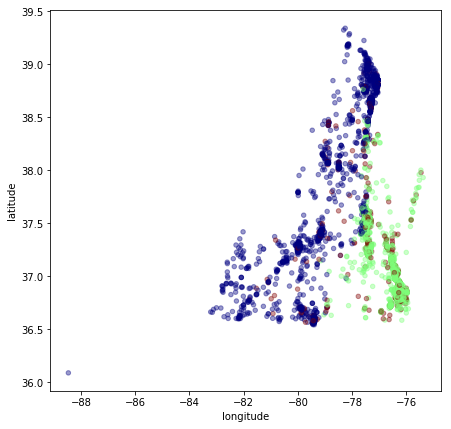

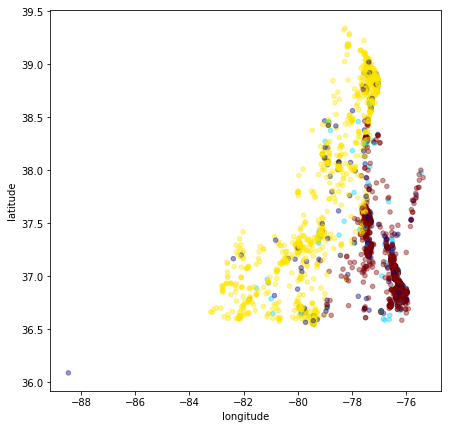

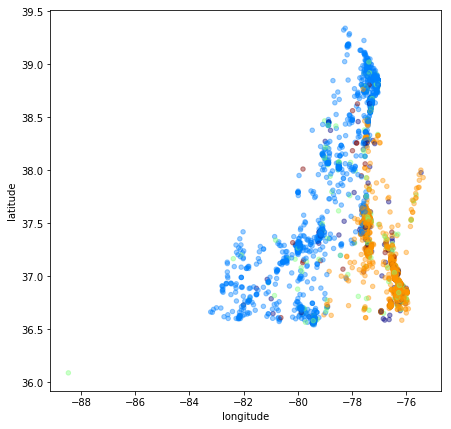

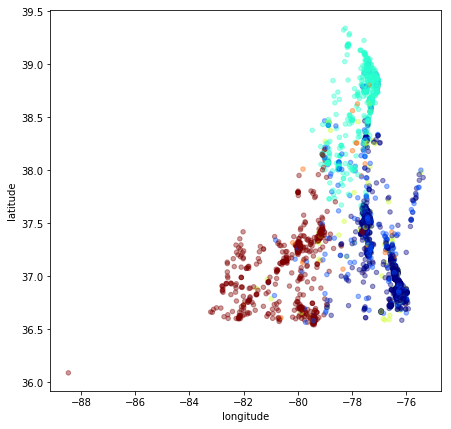

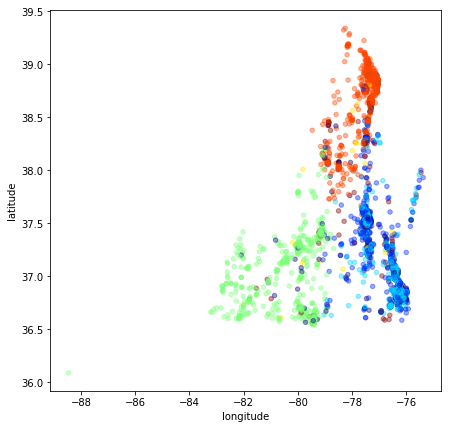

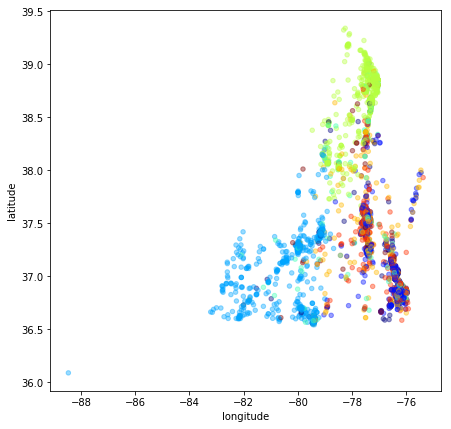

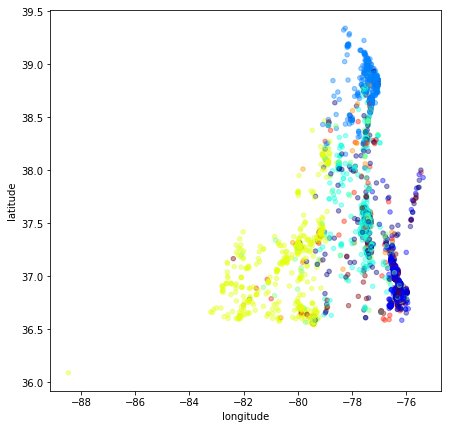

In [45]:
from sklearn.cluster import KMeans
scaler = StandardScaler() # Use a new scaler for clustering because we need to claim a variable so that we can inverse later
raw_cluster_data = processed_data_new.drop(["index","city_or_county"],axis=1)
cluster_data = scaler.fit_transform(raw_cluster_data) # city_or_county is dropped
for i in range(2,10):
    print(i, "clusters:")
    est = KMeans(n_clusters=i)    
    est.fit(cluster_data)
    print("Sum of squared distances of samples to their closest cluster center is:", est.inertia_)
    labels = est.labels_
    true_centers = scaler.inverse_transform(est.cluster_centers_) # inverse standard scaler
    print("Cluster centers (inversed):", true_centers)
    raw_cluster_data["clusterlabel"] = labels
    raw_cluster_data.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
        figsize=(7,7), c="clusterlabel", cmap=plt.get_cmap("jet"), colorbar=False,
        sharex=False)
raw_cluster_data = raw_cluster_data.drop(["clusterlabel"],axis=1) # drop the label I added to the data

## Find the optimum number of clusters
Plot the inertias vs. k (less inertia is better). In handson-ml, the good $k$ is where there is an elbow in the graph. Here it is not obvious

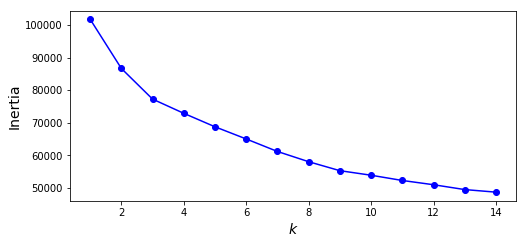

In [46]:
maxk = 15
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(cluster_data)
                for k in range(1, maxk)]
inertias = [model.inertia_ for model in kmeans_per_k]

plt.figure(figsize=(8, 3.5))
plt.plot(range(1, maxk), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.show()

Use _silhouette score_, which is the mean _silhouette coefficient_ over all the instances. An instance's silhouette coefficient is equal to $(b - a)/\max(a, b)$ where $a$ is the mean distance to the other instances in the same cluster (it is the _mean intra-cluster distance_), and $b$ is the _mean nearest-cluster distance_, that is the mean distance to the instances of the next closest cluster (defined as the one that minimizes $b$, excluding the instance's own cluster). The silhouette coefficient can vary between -1 and +1: a coefficient close to +1 means that the instance is well inside its own cluster and far from other clusters, while a coefficient close to 0 means that it is close to a cluster boundary, and finally a coefficient close to -1 means that the instance may have been assigned to the wrong cluster.

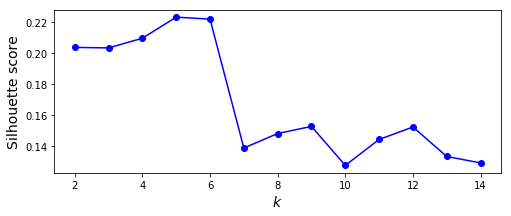

In [47]:
from sklearn.metrics import silhouette_score
silhouette_scores = [silhouette_score(cluster_data, model.labels_)
                     for model in kmeans_per_k[1:]]
plt.figure(figsize=(8, 3))
plt.plot(range(2, maxk), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.show()

From the graph we see 5 or 6 clusters might be best, maybe we can look into the centers in 5 or 6 clusters.

## A 3D version plotting including year, but it seems not good

2 clusters:
Sum of squared distances of samples to their closest cluster center is: 86663.30060855458
Cluster centers: [[ 2.32961907e-01  6.74527080e-01  3.11272350e+00  3.71641643e+01
  -7.67852213e+01  8.00093288e+01  8.58434828e+00  6.32469552e+00
   2.01565846e+03  2.35812387e-02  1.23607152e-01  1.24306815e+00
   1.29100803e+00  1.61181653e-01  2.60171029e-01  4.41306038e-01
   9.52837523e-01  6.80228038e-01]
 [ 2.48606466e-01  4.18617614e-01  6.97157191e+00  3.77874428e+01
  -7.88231185e+01  2.97619844e+01  2.52697882e+01  6.29375697e+00
   2.01567224e+03  1.50501672e-02  1.10925307e-01  1.31493868e+00
   1.27982163e+00  1.83946488e-01  5.39018952e-01  3.45596433e-01
   6.65551839e-01  9.25863991e-01]]
3 clusters:
Sum of squared distances of samples to their closest cluster center is: 77261.51525330047
Cluster centers: [[ 2.36890808e-01  3.88648982e-01  7.06847625e+00  3.77907207e+01
  -7.88574568e+01  2.95934608e+01  2.55058606e+01  6.26896977e+00
   2.01571067e+03  1.35718692e-

Sum of squared distances of samples to their closest cluster center is: 57748.89297634639
Cluster centers: [[ 1.13806971e+00  1.28686327e-01  3.26943700e+00  3.72389194e+01
  -7.69617826e+01  7.59061662e+01  1.01018767e+01  6.45576408e+00
   2.01577078e+03 -6.24500451e-17  7.90884718e-02  1.54021448e+00
   1.39142091e+00  2.43967828e-01  3.13672922e-01  8.71313673e-02
   1.13672922e+00  5.25469169e-01]
 [ 3.78906250e-01  4.88281250e-01  3.98046875e+00  3.74337887e+01
  -7.74975008e+01  6.20273438e+01  1.41835938e+01  6.44140625e+00
   2.01603906e+03  6.93889390e-18  4.80468750e-01  2.94921875e+00
   3.14062500e+00  2.46093750e-01  2.73046875e+00  9.37500000e-02
   8.00781250e-01  2.81640625e+00]
 [ 1.50521610e-01  3.27868852e-01  7.85543964e+00  3.86158256e+01
  -7.76309781e+01  4.39388972e+01  2.87645306e+01  6.27123696e+00
   2.01570939e+03 -1.42247325e-16  7.74962742e-02  9.56780924e-01
   9.43368107e-01  1.02831595e-01  4.03874814e-01  2.66766021e-01
   4.72429210e-01  7.13859911e-

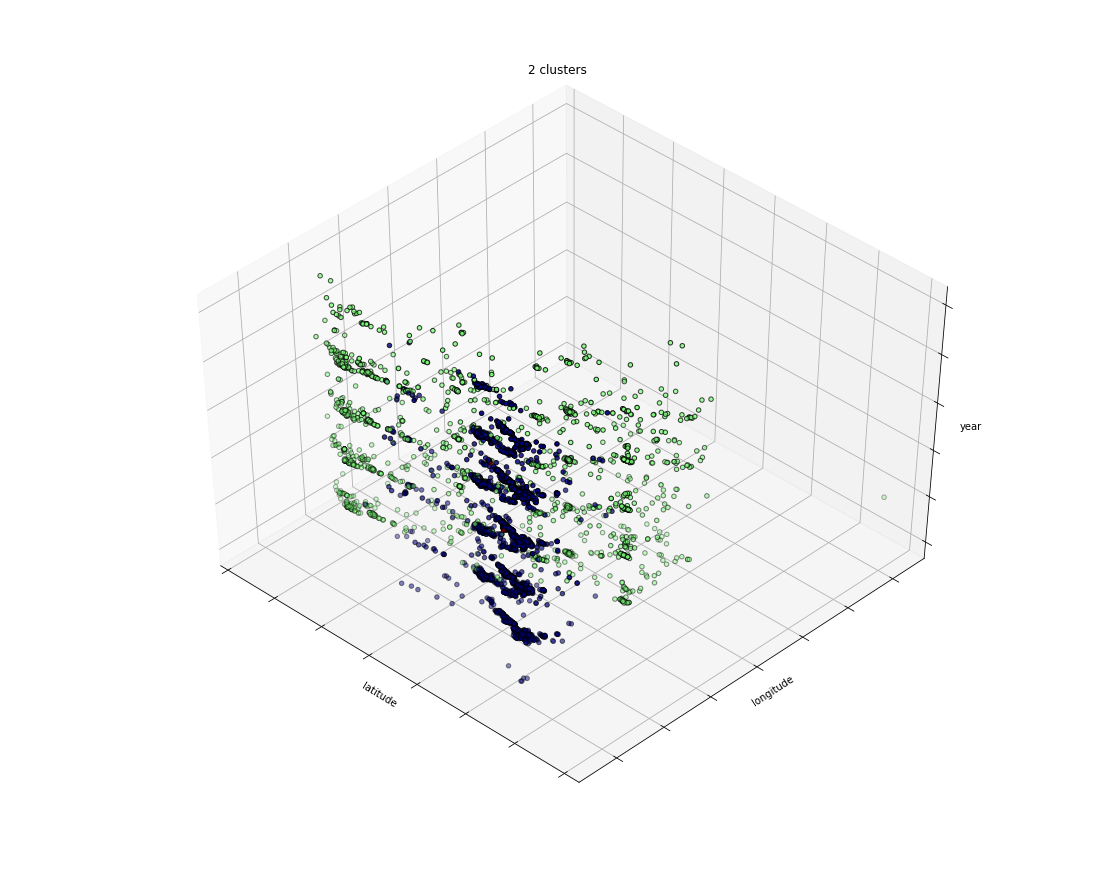

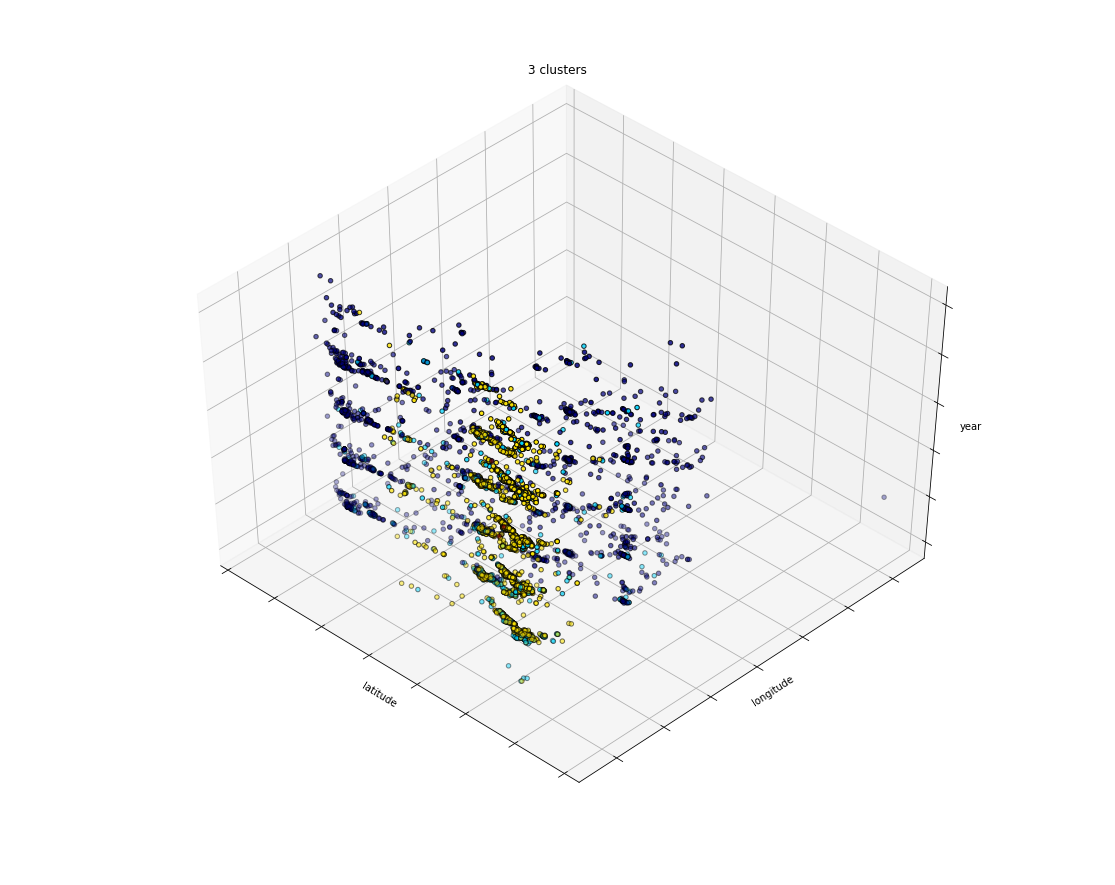

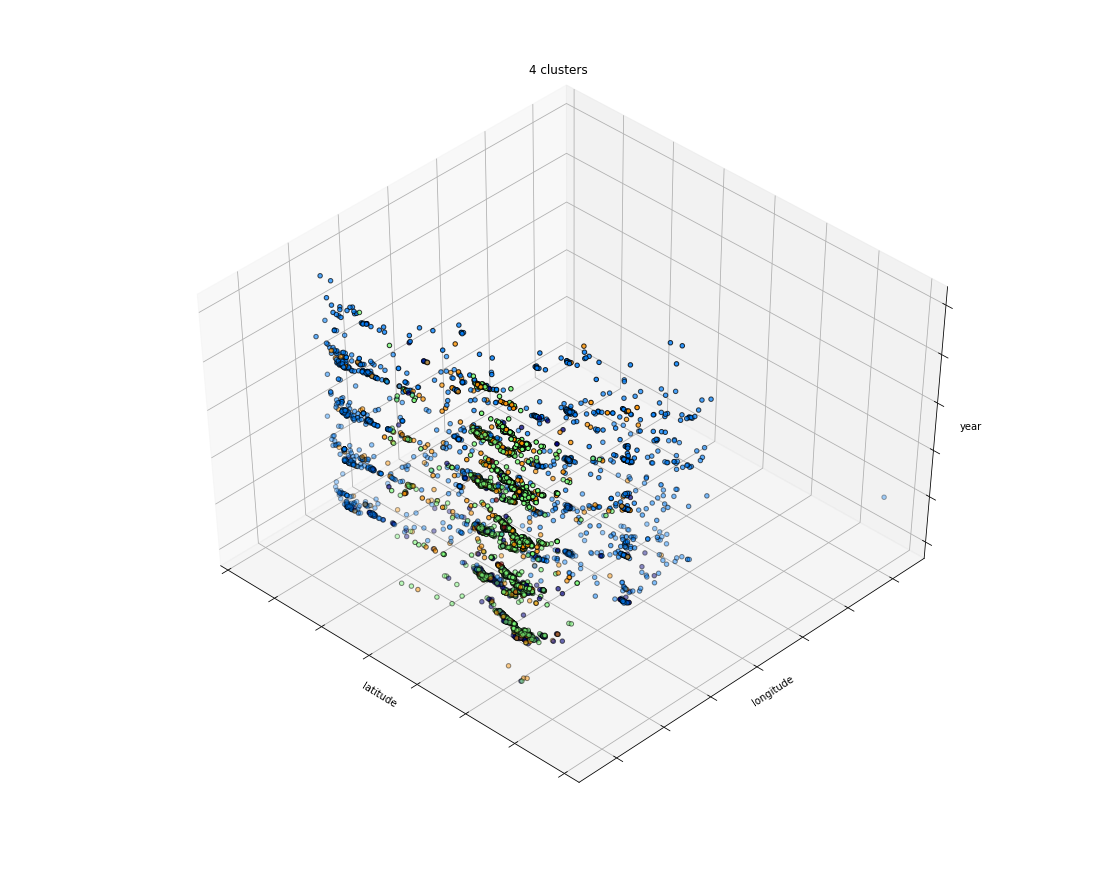

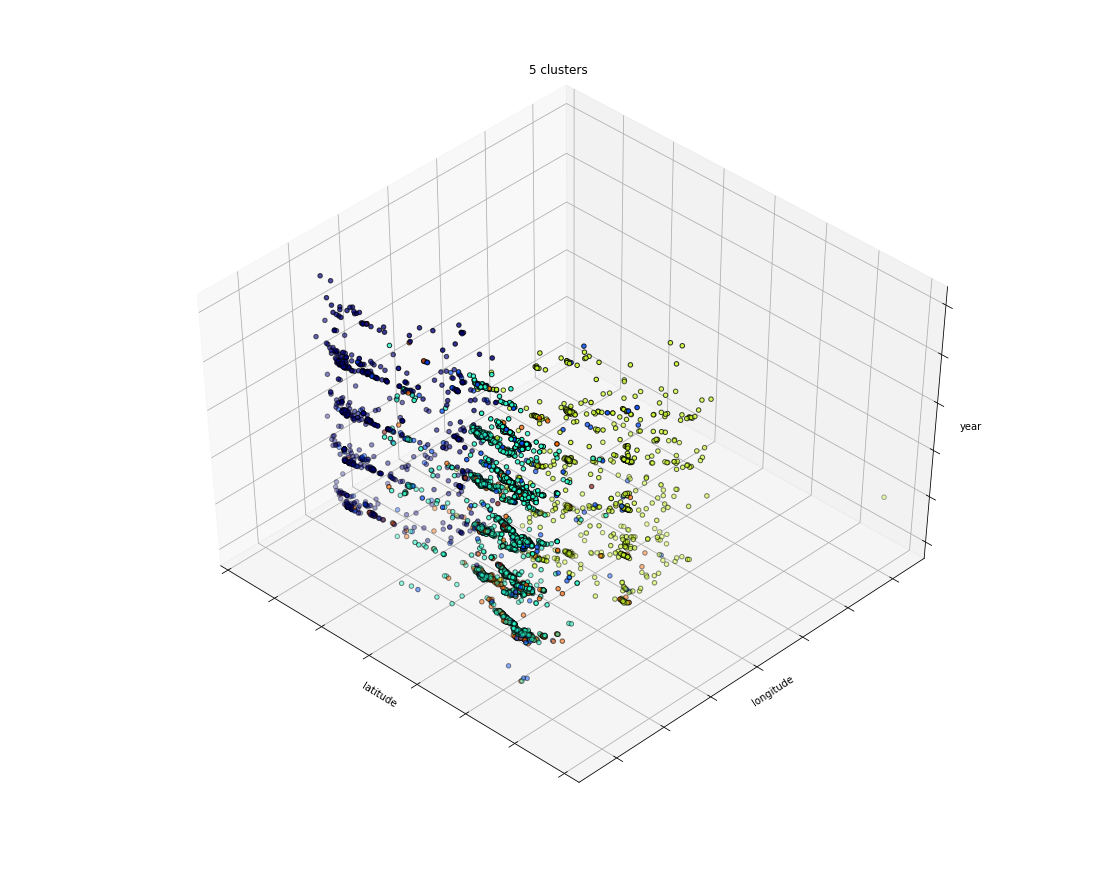

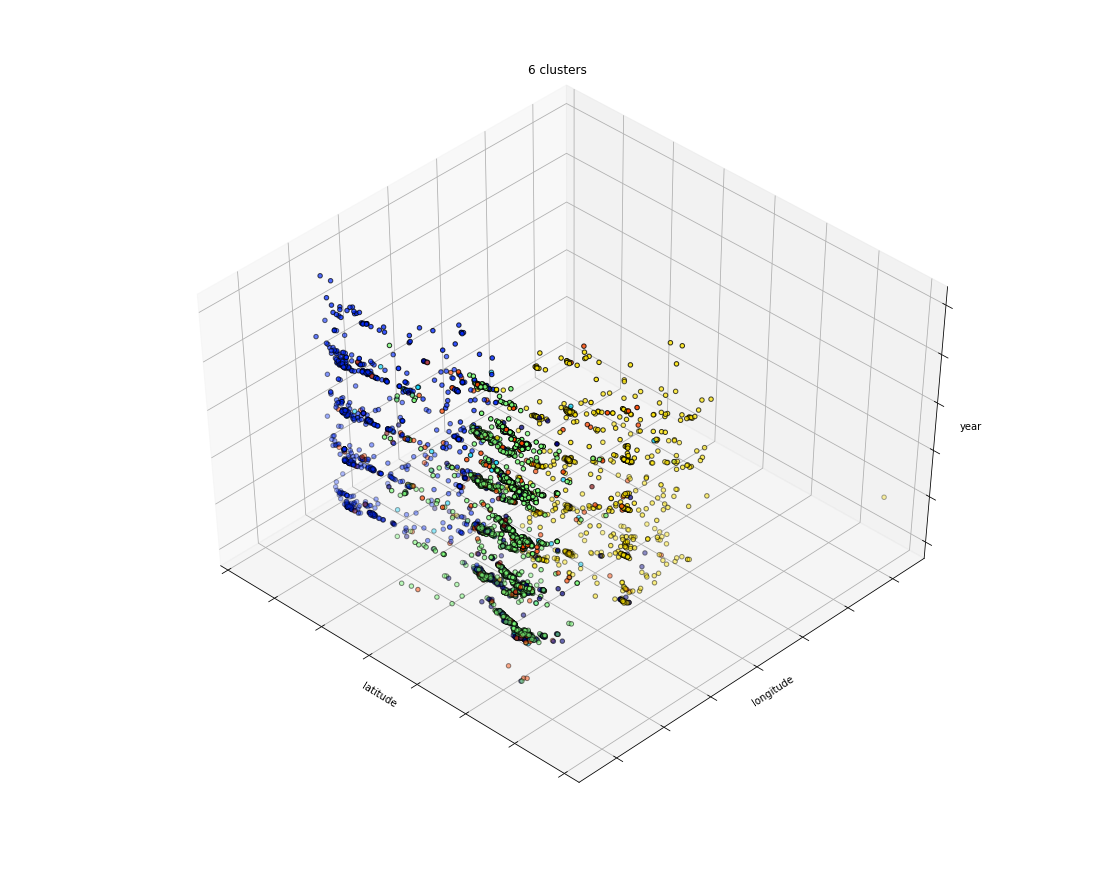

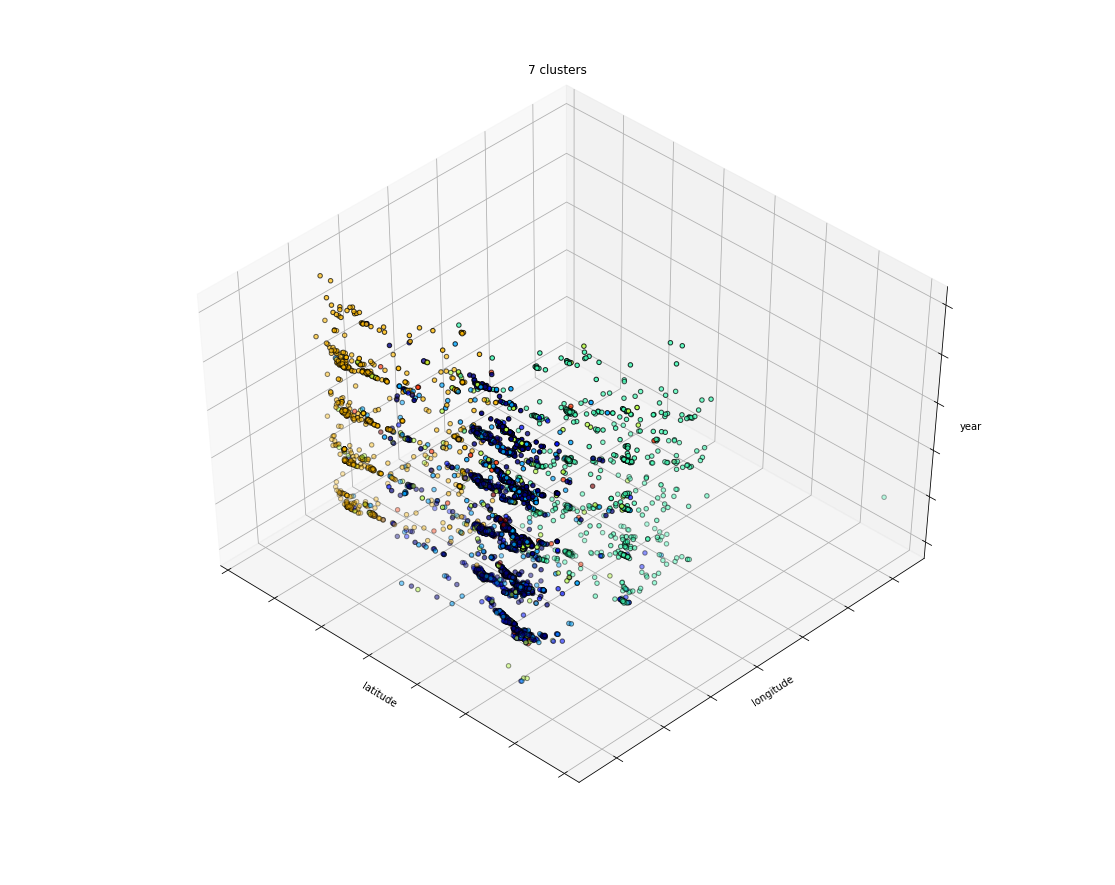

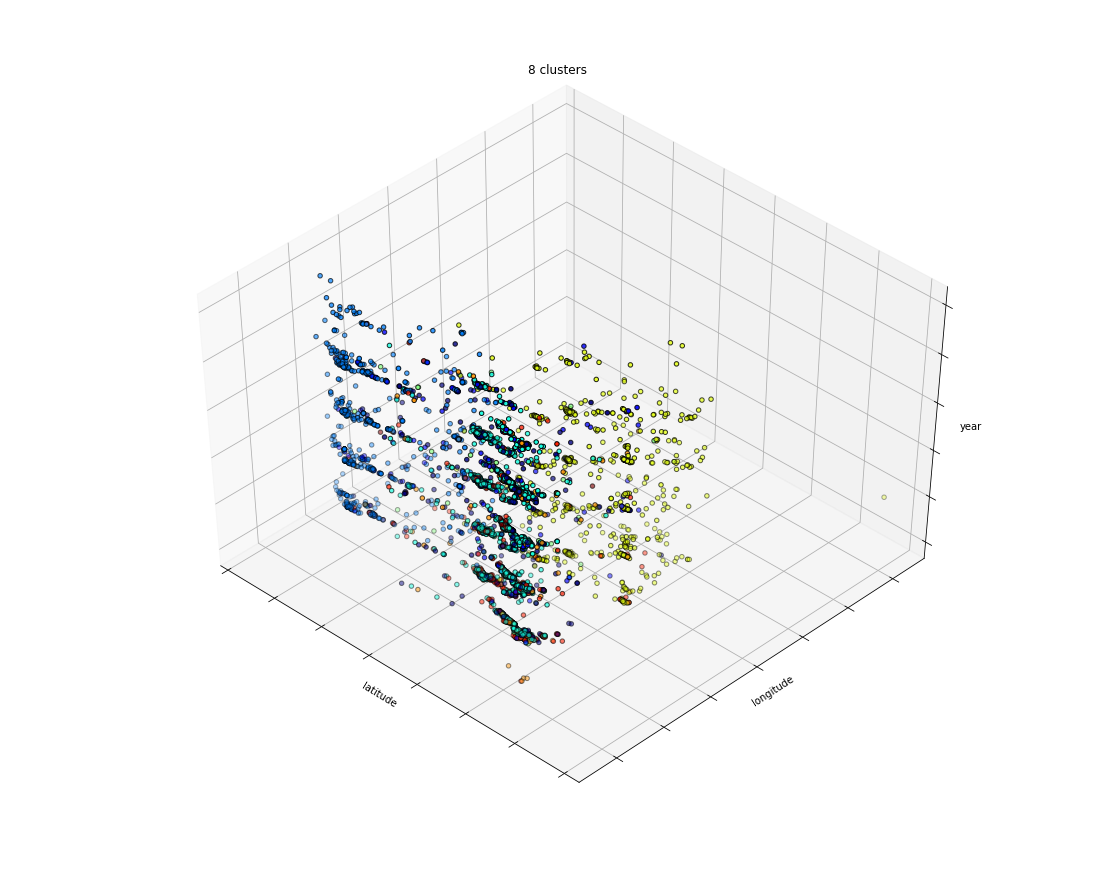

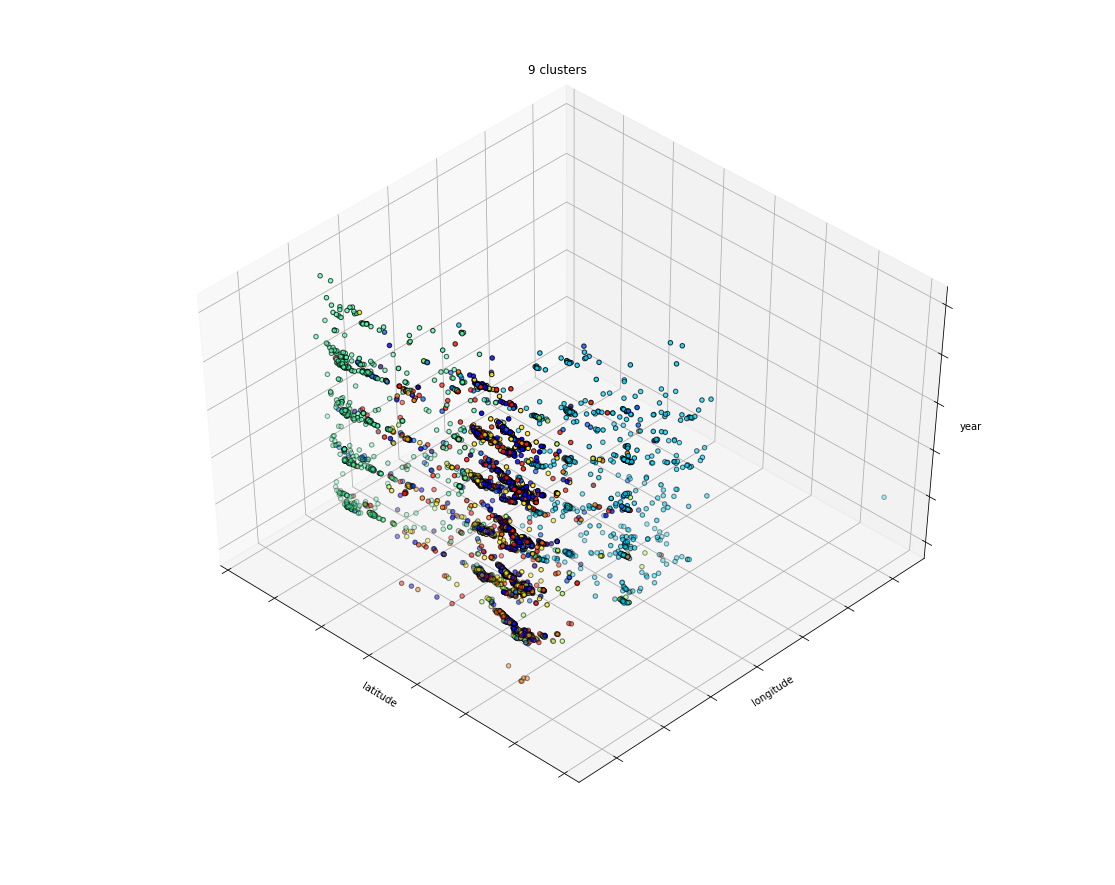

In [49]:
from mpl_toolkits.mplot3d import Axes3D

for i in range(2,10):
    fig = plt.figure(i, figsize=(16, 12))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    print(i, "clusters:")
    est = KMeans(n_clusters=i)    
    est.fit(cluster_data)
    print("Sum of squared distances of samples to their closest cluster center is:", est.inertia_)
    true_centers = scaler.inverse_transform(est.cluster_centers_) # inverse standard scaler to get the centers in the original data
    labels = est.labels_
    print("Cluster centers:", true_centers)
    for j in range(i): # Here I tried to add the centers to the data and plot it in a different color by giving them a different label
                       # But as you can see, there are so many points in the graph that you cannot find the centers.
        temp = pd.DataFrame([true_centers[j]], columns=list(raw_cluster_data))
        raw_cluster_data = raw_cluster_data.append(temp)
        labels = np.append(labels, i)
    ax.scatter(list(raw_cluster_data["latitude"]), list(raw_cluster_data["longitude"]), list(raw_cluster_data["year"]),
               c=labels,cmap=plt.get_cmap("jet"), edgecolor='k') # x-axis as latitude, y as longitude, z as year
    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('latitude')
    ax.set_ylabel('longitude')
    ax.set_zlabel('year')
    ax.set_title("%d clusters" % (i))
    ax.dist = 12
    raw_cluster_data = raw_cluster_data[:-i] # Remove the centers for 'i' clusters

# Dimensionality reduction
## PCA

In [50]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95) # Directly find the number of components that include 95% variance
pca.fit(cluster_data) # PCA will do centering automatically, but not scaling. It is recommended to use scaled data before pca if features 
                      # have different units according to some information on the Internet.
pca.n_components_

12

So 12 dimensions would contain 95% variance. It seems the number of dimension is not reduced too much.

In [51]:
np.sum(pca.explained_variance_ratio_)

0.9578481691175428

## Kernal PCA, but there is something wrong in matrix manipulation and an error keeps going on for each type of kernel

In [52]:
from sklearn.decomposition import KernelPCA
# lin_pca = KernelPCA(n_components = 0.95, kernel="linear")
# rbf_pca = KernelPCA(n_components = 0.95, kernel="rbf", gamma=10)
# sig_pca = KernelPCA(n_components = 0.95, kernel="sigmoid", gamma=0.001, coef0=1)
# lin_pca.fit(cluster_data)
# rbf_pca.fit(cluster_data)
# sig_pca.fit(cluster_data)
# print("Number of components in linear pca:", lin_pca.n_components_)
# print("Number of components in rbf pca:", rbf_pca.n_components_)
# print("Number of components in sigmoid pca:", sig_pca.n_components_)

## LLE

In [53]:
from sklearn.manifold import LocallyLinearEmbedding
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10, random_state=42)
X_reduced = lle.fit_transform(cluster_data) # There seems no information about whether to scale data before LLE. I think we should do because 
                                            # in LLE distance between datapoints is computed
lle.reconstruction_error_ # Reconstruction error associated with embedding_

1.3170421512439764e-18

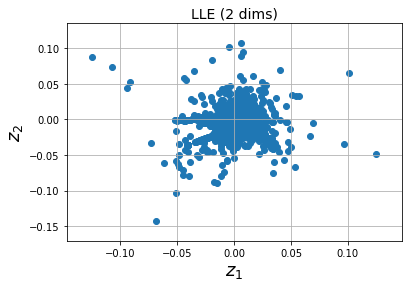

In [54]:
plt.title("LLE (2 dims)", fontsize=14)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1])
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18)
plt.grid(True)

plt.show()